Autor: Tiago Buriol

## A short guide and example to run fingerprint

We whant to estimate the proportion contributed from each source to sediment samples taked in river and measure the increase in incertainty when reducing the number of samples using a implementation of Marke and Minella (2016) method. 


The first think to do is to import the fingerprinting python module as is showed bellow:

In [1]:
from fingerprint import Fingerprint

Then, we need to create a fingerprint object instance and set the data file.

In [2]:
fp = Fingerprint("sampledata.xls")

Now we can see some infos.

In [3]:
fp.infos()

Sheet name: a_fonte(D)
Columns: ['Fe' 'Mn' 'Cu' 'Zn' 'Ca' 'K' 'P']
Number of samples: 9
--
Sheet name: a_fonte(E)
Columns: ['Fe' 'Mn' 'Cu' 'Zn' 'Ca' 'K' 'P']
Number of samples: 9
--
Sheet name: a_fonte(L)
Columns: ['Fe' 'Mn' 'Cu' 'Zn' 'Ca' 'K' 'P']
Number of samples: 20
--
Sheet name: Sedimentos(Y)
Columns: ['Fe' 'Mn' 'Cu' 'Zn' 'Ca' 'K' 'P']
Number of samples: 24
--


In [4]:
nY = 24 # max 24
nD = 9  # max 9
nE = 9  # max 9
nL = 20 # max 20

# RODA A SIMULAÇÃO
P = fp.run(nY,nD,nE,nL)
print(P.shape)

(2, 8129)


Show de results.

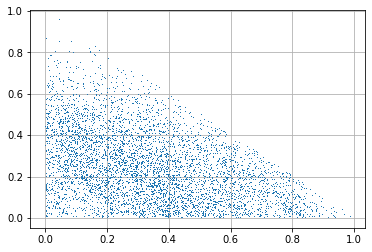

In [5]:
fp.plot2D(P)

Evaluating and show de confidence region.

Área: 0.39720308998960696


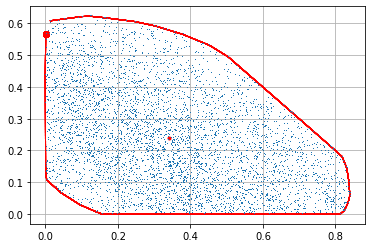

In [6]:
P = fp.confidence_region(P, p = 95)
fp.plot2D(P, mean=True, convex_hull = True)

In [7]:
CVYs = []
nYs = [2,4,8,12,16,20,24]
for nY in nYs:
    CV = fp.multi_runs(50, nY,nD,nE,nL)
    CVYs.append(CV)

CVLs = []
nLs = [2,4,8,12,16,20]
for nL in nLs:
    CVLs.append(fp.multi_runs(50, nY,nD,nE,nL))
    

2 9 9 20 0.358 0.0412 3240 1221 0.259 0.267 0.474
4 9 9 20 0.378 0.0213 6480 1051 0.348 0.245 0.407
8 9 9 20 0.392 0.0182 12960 2710 0.297 0.282 0.421
12 9 9 20 0.398 0.0098 19440 3995 0.331 0.245 0.424
16 9 9 20 0.401 0.0082 25920 5177 0.305 0.247 0.448
20 9 9 20 0.4 0.005 32400 6959 0.34 0.238 0.422
24 9 9 20 0.401 0.002 38880 7704 0.34 0.238 0.422
24 9 9 2 0.349 0.0484 3888 1034 0.389 0.276 0.335
24 9 9 4 0.378 0.0289 7776 1497 0.389 0.23 0.381
24 9 9 8 0.392 0.0159 15552 2765 0.366 0.235 0.399
24 9 9 12 0.396 0.0092 23328 4720 0.34 0.243 0.417
24 9 9 16 0.398 0.0075 31104 6222 0.347 0.238 0.415
24 9 9 20 0.401 0.0017 38880 7678 0.336 0.239 0.425


In [10]:
import matplotlib.pyplot as plt

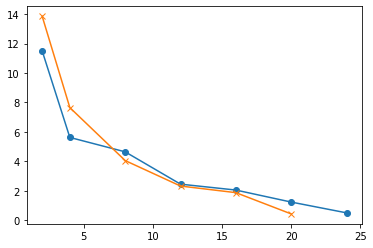

In [11]:
plt.plot(nYs, CVYs, "o-",nLs, CVLs,"x-")
plt.show()